# <b>1. ПОДГОТОВИТЕЛЬНЫЙ ЭТАП</b>

In [ ]:
import gdown
import zipfile
from pathlib import Path

# Загрузка архива
# stable link https://drive.google.com/file/d/1JdDlgpvtlMN99X0eAruGqXrMNi_sh1sg
ident = '1JdDlgpvtlMN99X0eAruGqXrMNi_sh1sg'
fname = 'emotions'

# Пусть к основной папке с изображениями
p = Path('./data')

# Путь к базовой директории, которая будет создана чуть позже
base_dir = p / fname

local_zip = gdown.download(id=ident, output = fname + '.zip')

Downloading...
From: https://drive.google.com/uc?id=1JdDlgpvtlMN99X0eAruGqXrMNi_sh1sg
To: /content/emotions.zip
100%|██████████| 14.8M/14.8M [00:00<00:00, 150MB/s]


In [ ]:
# Пусть к основной папке с изображениями
p = Path('./data')

# Путь к базовой директории, которая будет создана чуть позже
base_dir = p / fname

with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(p)

In [ ]:
import os

os.remove(fname + '.zip')

In [ ]:
def change_permissions_recursive(path, mode):
    for root, dirs, files in os.walk(path, topdown=False):
        for dr in [os.path.join(root,d) for d in dirs]:
            os.chmod(dr, mode)
        for file in [os.path.join(root, f) for f in files]:
                os.chmod(file, mode)

In [ ]:
zip_content = os.listdir(p)[0]
zip_content

'emotions_dataset'

In [ ]:
done = False

while done == False:
    try:
        change_permissions_recursive(p, 0o777)
        change_permissions_recursive(p / zip_content, 0o777)
        zip_content = os.renames(p / zip_content,
                   base_dir)
        done = True
    except:
        continue

In [ ]:
from pathlib import Path

# Базовая директория
base_dir = p / fname
# # base_dir = '/content/drive/MyDrive/Sber DS/Diploma/data/emotions/'  # for colab
classes = sorted(os.listdir(base_dir))

num_classes = len(classes)

# и ее содержимое
print("Содержимое базовой директории:")
print(classes)
print('Количество классов:', num_classes)

Содержимое базовой директории:
['ANGER', 'DISGUST', 'FEAR', 'JOYFULNESS', 'NEUTRAL']
Количество классов: 5


In [ ]:
# class_names = [x.lower() for x in classes]
class_names = sorted(['anger', 'disgust', 'fear', 'joyfulness', 'neutral'])

done = False
while done == False:
    try:
        change_permissions_recursive(base_dir, 0o777)
        done = True
    except:
        continue

done = False
while done == False:
    try:
        for i, class_name in enumerate(sorted(class_names)):
            change_permissions_recursive(base_dir/class_name, 0o777)
            os.renames(base_dir/classes[i], base_dir/class_name)
        done = True
    except:
        continue

classes = sorted(os.listdir(base_dir))

In [ ]:
classes

['anger', 'disgust', 'fear', 'joyfulness', 'neutral']

### Удалим некорректные файлы

In [ ]:
from pathlib import Path
from tensorflow.io import read_file
from tensorflow.image import decode_image

def delete_corrupted_files(folder, base_dir):
    for image in sorted((base_dir / f'{folder}').glob('*')):
        try:
            img = read_file(str(image))
            img = decode_image(img)

            if img.ndim != 3:
                print(f"[FILE_CORRUPT] {str(image).split('/')[-1]} DELETED")
                image.unlink()

        except Exception as e:
            print(f"[ERR] {str(image).split('/')[-1]}: {e} DELETED")
            image.unlink()

In [ ]:
for folder in classes:
    print(folder)
    delete_corrupted_files(folder, base_dir)

anger
disgust
[ERR] 5a971597aae6052a008b45a7.webp: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] DELETED
[ERR] Universal_Expression_Disgust.webp: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] DELETED
[ERR] gettyimages-520925691.webp: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] DELETED
fear
joyfulness
neutral


In [ ]:
anger_dir, disgust_dir, fear_dir, joyfulness_dir, neutral_dir = [base_dir / classes[i]
                                                   for i in range(len(classes))]
directories = anger_dir, disgust_dir, fear_dir, joyfulness_dir, neutral_dir


anger_fnames, disgust_fnames, fear_fnames, joyfulness_fnames, neutral_fnames = [os.listdir(i)
                                                              for i in directories]
files_names = anger_fnames, disgust_fnames, fear_fnames, joyfulness_fnames, neutral_fnames


for i, cls_name in enumerate(class_names):
    print(cls_name + ':', len(files_names[i]))

anger: 174
disgust: 292
fear: 177
joyfulness: 339
neutral: 398


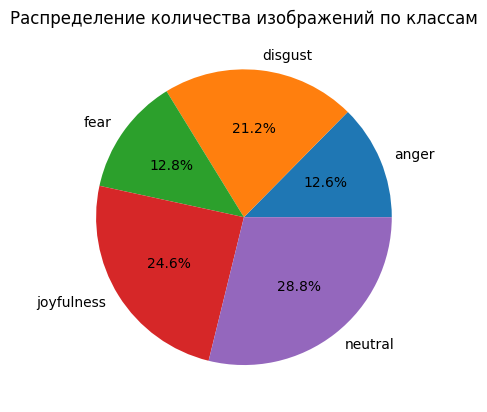

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



x = np.array([len(anger_fnames), len(disgust_fnames),
              len(fear_fnames), len(joyfulness_fnames),
              len(neutral_fnames)])

plt.title('Распределение количества изображений по классам')
plt.pie(x, labels=classes, autopct='%.1f%%');

In [ ]:
print(len(class_names))

5


In [ ]:
for i, j in zip(class_names, files_names):
    print(i, j[90:93])

anger ['6871.jpg', '62666.jpg', '25952.jpg']
disgust ['247715.jpg', '82738.jpg', '18521.jpg']
fear ['15346.jpg', '276139.jpg', '109275.jpg']
joyfulness ['96730.jpg', '414733.jpg', '6827.jpg']
neutral ['1453.jpg', '103552.jpg', '146521.jpg']


In [ ]:

# Параметры для отрисовки - количество строк и столбцов
nrows = 5
ncols = 4

# Индекс для итерации изображений
pic_index = 0

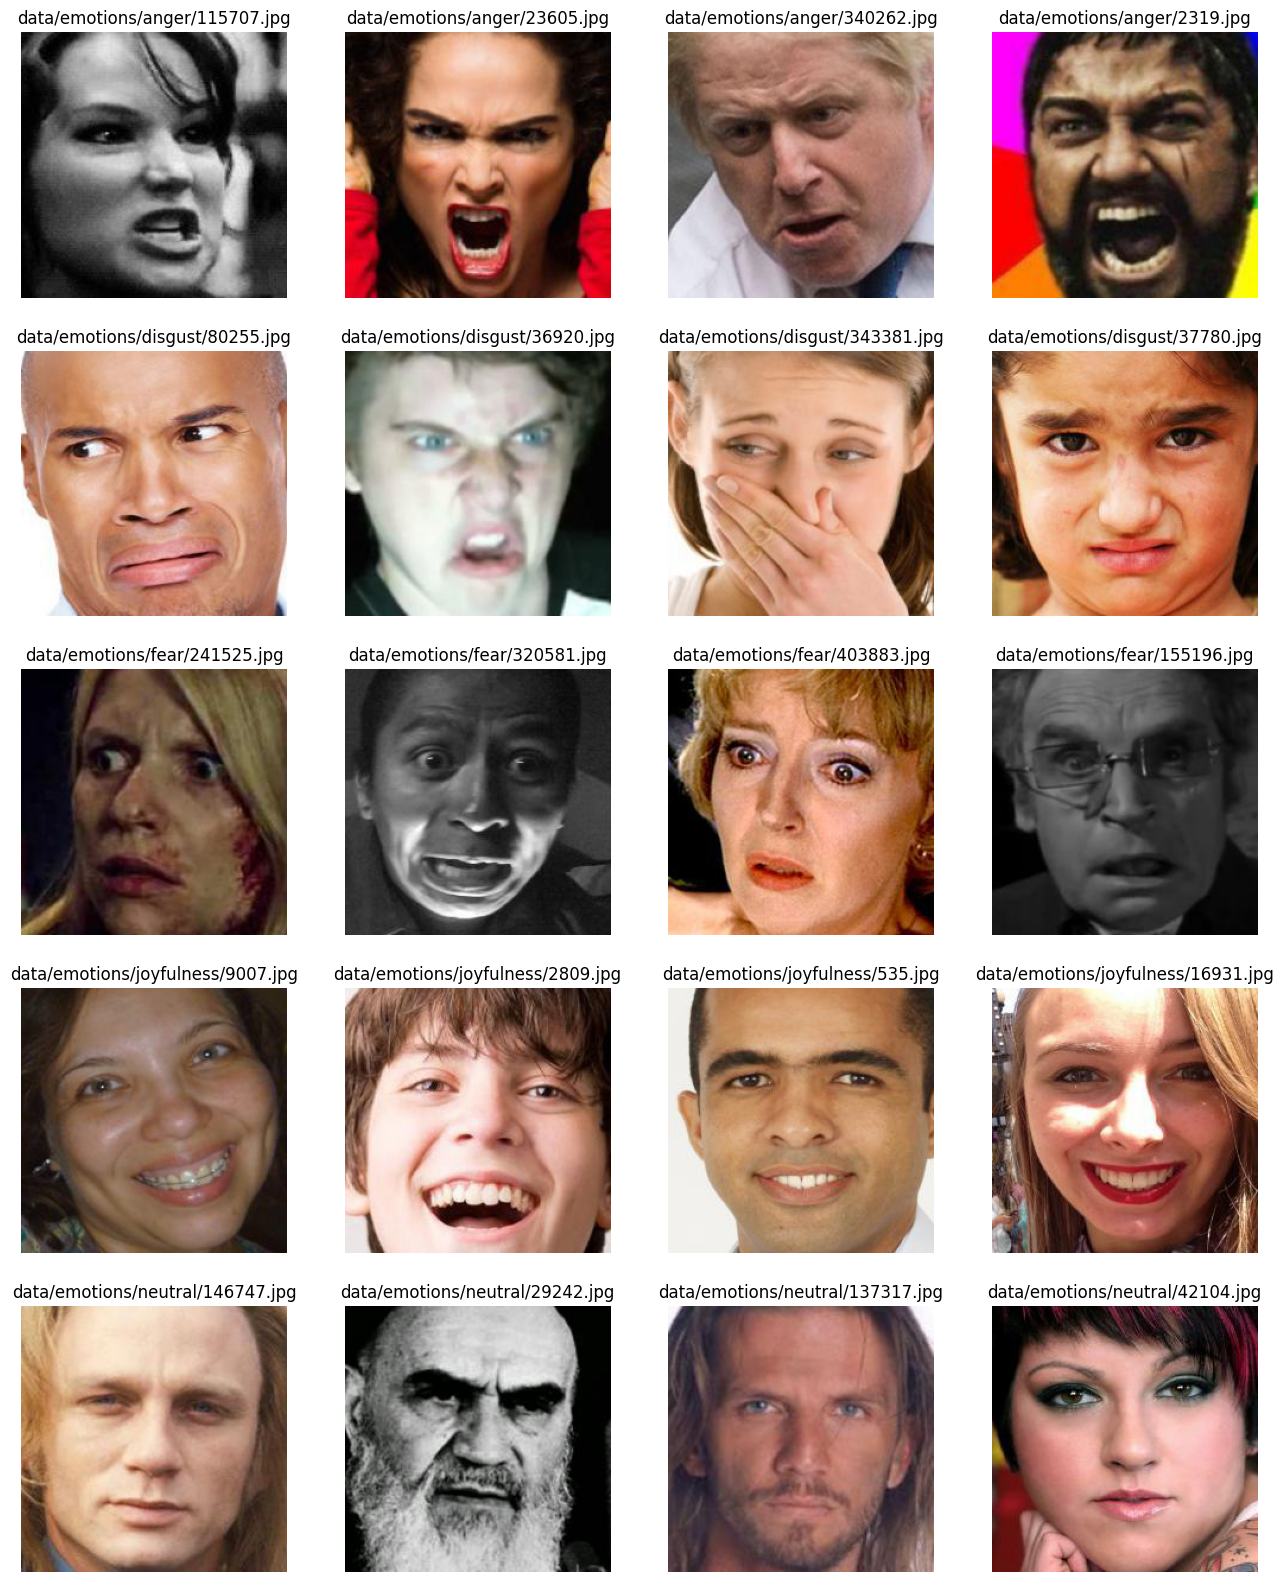

In [ ]:
# Запустите эту ячейку несколько раз, чтобы увидеть разные наборы фотографий

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 4

next_anger_pic = [os.path.join(anger_dir, fname)
                for fname in anger_fnames[pic_index-4:pic_index]]
next_disgust_pic = [os.path.join(disgust_dir, fname)
                for fname in disgust_fnames[pic_index-4:pic_index]]
next_fear_pic = [os.path.join(fear_dir, fname)
                for fname in fear_fnames[pic_index-4:pic_index]]
next_joyfulness_pic = [os.path.join(joyfulness_dir, fname)
                for fname in joyfulness_fnames[pic_index-4:pic_index]]
next_neutral_pic = [os.path.join(neutral_dir, fname)
                for fname in neutral_fnames[pic_index-4:pic_index]]


for i, img_path in enumerate(next_anger_pic+next_disgust_pic+
                            next_fear_pic+next_joyfulness_pic+
                            next_neutral_pic):
    ax = plt.subplot(nrows, ncols, i+1)
    ax.axis(False)
    plt.title(img_path)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)


In [ ]:

import shutil 
from pathlib import Path

import numpy as np 
import random


from tqdm import tqdm
import copy
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau, StepLR

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary
import albumentations as A
import albumentations.pytorch as AP
from albumentations.pytorch import ToTensorV2

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90, Resize, RandomCrop,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Rotate, RandomScale, RandomGridShuffle,
    RandomContrast, RandomGamma, RandomBrightness, CenterCrop, VerticalFlip, ColorJitter,
    ChannelShuffle, InvertImg, RGBShift, ElasticTransform, Equalize, RandomResizedCrop, ChannelDropout
)
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm

print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version: ", hub.__version__)
print('GPU Device Found.' if tf.config.list_physical_devices('GPU') else 'GPU Device Not Found. Running on CPU')

[INFO] Couldn't find torchinfo... installing it.
TensorFlow Version: 2.11.0
TensorFlow Hub Version:  0.13.0
GPU Device Not Found. Running on CPU


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
from PIL import Image
from sklearn import preprocessing

base_path = Path('./data/emotions')
class_names = sorted(os.listdir(base_path))

# удалим файлы с неподходящим разрешением
for clss in class_names:
    for image in sorted(os.listdir(base_path/clss)):
        fpath = (base_path/clss/image)
        img = Image.open(fpath)
        img = np.array(img)
        if img.shape == (224, 224, 3):
            continue
        else:
            print('Oops')
            fpath.unlink()

# создадим пустные списки для векторов по классам
anger_features = []
disgust_features = []
fear_features = []
joyfulness_features = []
neutral_features = []
features_lst= sorted([anger_features, disgust_features,
                      fear_features, joyfulness_features,
                      neutral_features])

# переведем изображения в вектора, добавим таргет
# и сохраним в списках
final_df = pd.DataFrame()
for name, lst in zip(class_names, features_lst):
    fpath = base_path / name
    lst_idx = features_lst.index(lst)
    for img in os.listdir(fpath):

        img = Image.open(fpath/img)
        img = np.array(img)

        pixels1 = img.shape[0]
        pixels2 = img.shape[1]
        channels = img.shape[2]

        a = np.reshape(img, (pixels1*pixels2*channels))
        b = np.ones(1, dtype='uint8')*lst_idx
        c = np.append(a, b)
        lst.append(c)

    # объединим все данные в общую таблицу
    final_df = pd.concat([final_df, pd.DataFrame(lst)], axis=0)

Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops


In [ ]:
final_df.index = range(final_df.shape[0])

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,150528
0,30,30,30,25,25,25,19,19,19,17,...,48,48,48,45,45,45,40,40,40,0
1,21,12,7,23,14,9,25,16,11,25,...,-38,3,18,-40,4,18,-40,4,18,0
2,107,87,60,106,86,59,107,86,59,111,...,-60,-58,-43,-59,-57,-42,-58,-56,-41,0
3,-1,0,-1,-1,0,-1,-1,0,-1,-1,...,-1,-1,2,-1,-1,4,-1,-1,4,0
4,33,14,0,35,16,2,38,20,6,38,...,90,54,30,84,48,24,78,42,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,-48,-35,-29,-55,-42,-36,-66,-55,-49,-73,...,-44,-36,-23,-51,-43,-30,-53,-45,-32,4
1368,122,-120,83,114,-128,77,98,107,64,80,...,32,52,61,32,52,59,32,52,59,4
1369,-5,-6,-8,-5,-6,-8,-5,-6,-8,-5,...,39,34,31,39,34,31,39,34,31,4
1370,-109,-123,-126,-95,-109,-112,-117,124,119,103,...,-77,-114,123,-79,-116,124,-84,-124,122,4


In [ ]:
my_array = np.array([i for i in range (1372)])
my_array

array([   0,    1,    2, ..., 1369, 1370, 1371])

In [ ]:
final_df.columns

RangeIndex(start=0, stop=150529, step=1)

In [ ]:
#final_df['number']=[i for i in range(1372)]

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,150528
0,30,30,30,25,25,25,19,19,19,17,...,48,48,48,45,45,45,40,40,40,0
1,21,12,7,23,14,9,25,16,11,25,...,-38,3,18,-40,4,18,-40,4,18,0
2,107,87,60,106,86,59,107,86,59,111,...,-60,-58,-43,-59,-57,-42,-58,-56,-41,0
3,-1,0,-1,-1,0,-1,-1,0,-1,-1,...,-1,-1,2,-1,-1,4,-1,-1,4,0
4,33,14,0,35,16,2,38,20,6,38,...,90,54,30,84,48,24,78,42,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,-48,-35,-29,-55,-42,-36,-66,-55,-49,-73,...,-44,-36,-23,-51,-43,-30,-53,-45,-32,4
1368,122,-120,83,114,-128,77,98,107,64,80,...,32,52,61,32,52,59,32,52,59,4
1369,-5,-6,-8,-5,-6,-8,-5,-6,-8,-5,...,39,34,31,39,34,31,39,34,31,4
1370,-109,-123,-126,-95,-109,-112,-117,124,119,103,...,-77,-114,123,-79,-116,124,-84,-124,122,4


In [ ]:
# Разделим данные на признаки и метки
y = final_df[150528]
X = final_df.drop(columns=[150528])


#Случайный лес с сокращением размерности признаков и нормализацией данных 

Для реализации алгоритма случайного леса с сокращением размерности признаков и нормализацией данных мы будем использовать метод SelectFromModel из библиотеки scikit-learn. 

Мы будем использовать некое базовое количество признаков, а с помощью метода SelectFromModel сможем автоматически отобрать оптимальное количество признаков для обучения модели. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
# Разобьём данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Создаем объект для случайного леса
rf_classifier = RandomForestClassifier()

In [ ]:
# Описываем пайплайн для автоматической настройки числа признаков
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(estimator=rf_classifier)),
    ('classification', rf_classifier),
])

In [ ]:
# Определяем диапазон базового количества признаков
min_features = 2
max_features = 1000

In [ ]:
# Определяем параметры для подбора оптимального числа базовых признаков и гиперпараметров деревьев
param_grid = {
    'feature_selection__threshold': ['mean', 'median', '1.25*mean'],
    'classification__n_estimators': [10, 50, 100],
    'classification__max_depth': [10, 20, 30],
}

In [ ]:
# Применяем кросс-валидацию для нахождения оптимальных параметров
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier())),
                                       ('classification',
                                        RandomForestClassifier())]),
             param_grid={'classification__max_depth': [10, 20, 30],
                         'classification__n_estimators': [10, 50, 100],
                         'feature_selection__threshold': ['mean', 'median',
                                                          '1.25*mean']})

In [ ]:
# Получаем оптимальный классификатор
optimized_rf_classifier = grid_search.best_estimator_

In [ ]:
optimized_rf_classifier

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='1.25*mean')),
                ('classification', RandomForestClassifier(max_depth=30))])

In [ ]:
# Прогнозируем значения на тестовом наборе данных
y_pred = optimized_rf_classifier.predict(X_test)

In [ ]:
y_test

783    3
781    3
605    2
583    2
921    3
      ..
886    3
396    1
936    3
738    3
619    2
Name: 150528, Length: 343, dtype: int8

In [ ]:
y_pred

array([1, 3, 4, 4, 3, 4, 4, 3, 3, 3, 1, 0, 3, 3, 2, 3, 4, 2, 2, 4, 4, 4,
       3, 3, 1, 2, 3, 3, 4, 4, 4, 3, 1, 4, 4, 4, 0, 4, 2, 3, 4, 4, 4, 3,
       4, 3, 3, 4, 4, 1, 4, 4, 2, 3, 4, 1, 3, 1, 4, 3, 4, 4, 3, 4, 4, 4,
       3, 4, 3, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 4, 4, 3, 1, 4, 0, 3, 4,
       4, 3, 1, 4, 1, 4, 1, 2, 1, 2, 3, 4, 4, 4, 4, 1, 4, 3, 3, 3, 4, 3,
       4, 3, 4, 2, 4, 3, 1, 4, 1, 4, 1, 3, 4, 3, 3, 3, 1, 4, 3, 3, 4, 3,
       4, 4, 4, 3, 3, 3, 3, 4, 3, 1, 1, 1, 4, 1, 3, 1, 4, 3, 4, 4, 3, 4,
       1, 4, 4, 4, 1, 3, 1, 3, 3, 1, 4, 2, 1, 4, 4, 3, 1, 4, 4, 3, 1, 2,
       1, 3, 3, 3, 1, 4, 3, 3, 1, 4, 3, 4, 3, 2, 4, 1, 4, 2, 4, 1, 1, 4,
       4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 1, 4, 3, 3, 4, 4, 4, 3, 1, 4, 1,
       4, 2, 3, 3, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 3, 0, 4, 4, 3, 0, 4, 4,
       3, 4, 3, 3, 3, 3, 4, 1, 3, 4, 4, 3, 2, 1, 3, 4, 4, 4, 4, 2, 4, 4,
       3, 1, 1, 3, 4, 4, 1, 4, 3, 3, 4, 3, 4, 1, 4, 3, 3, 2, 0, 4, 4, 4,
       3, 4, 4, 4, 3, 3, 4, 4, 3, 1, 2, 4, 2, 2, 0,

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Посчитаем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1-score (macro):", f1)


# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('____________________________')
print("Precision (micro):", prec)
print("Recall (micro):", rec)
print("F1-score (micro):", f1)


# Вычисление точности, полноты и F1-меры 
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print('____________________________')
print("Precision (None):", prec)
print("Recall (None):", rec)
print("F1-score (None):", f1)

Accuracy: 0.5131195335276968
Precision (macro): 0.5175410303981731
Recall (macro): 0.43463177171042344
F1-score (macro): 0.43779029300233124
____________________________
Precision (micro): 0.5131195335276968
Recall (micro): 0.5131195335276968
F1-score (micro): 0.5131195335276968
____________________________
Precision (None): [0.5        0.58181818 0.46153846 0.60204082 0.44230769]
Recall (None): [0.10810811 0.43243243 0.27272727 0.66292135 0.6969697 ]
F1-score (None): [0.17777778 0.49612403 0.34285714 0.63101604 0.54117647]


Попробуем увеличить диапазон признаков, а также максимальную глубину леса

In [ ]:
# Определяем диапазон базового количества признаков
min_features = 2
max_features = 5000

In [ ]:
# Определяем параметры для подбора оптимального числа базовых признаков и гиперпараметров деревьев
param_grid = {
    'feature_selection__threshold': ['mean', 'median', '1.25*mean'],
    'classification__n_estimators': [10, 500, 1000],
    'classification__max_depth': [10, 50, 100],
}

In [ ]:
# Применяем кросс-валидацию для нахождения оптимальных параметров
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier())),
                                       ('classification',
                                        RandomForestClassifier())]),
             param_grid={'classification__max_depth': [10, 50, 100],
                         'classification__n_estimators': [10, 500, 1000],
                         'feature_selection__threshold': ['mean', 'median',
                                                          '1.25*mean']})

In [ ]:
# Получаем оптимальный классификатор
optimized_rf_classifier = grid_search.best_estimator_

In [ ]:
optimized_rf_classifier

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='median')),
                ('classification',
                 RandomForestClassifier(max_depth=50, n_estimators=1000))])

In [ ]:
# Прогнозируем значения на тестовом наборе данных
y_pred = optimized_rf_classifier.predict(X_test)

In [ ]:
# Посчитаем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1-score (macro):", f1)


# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('____________________________')
print("Precision (micro):", prec)
print("Recall (micro):", rec)
print("F1-score (micro):", f1)


# Вычисление точности, полноты и F1-меры 
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print('____________________________')
print("Precision (None):", prec)
print("Recall (None):", rec)
print("F1-score (None):", f1)

Accuracy: 0.5131195335276968
Precision (macro): 0.5731619562559146
Recall (macro): 0.4257658577883297
F1-score (macro): 0.42452619520777335
____________________________
Precision (micro): 0.5131195335276968
Recall (micro): 0.5131195335276968
F1-score (micro): 0.5131195335276968
____________________________
Precision (None): [0.75       0.60416667 0.47826087 0.58510638 0.44827586]
Recall (None): [0.08108108 0.39189189 0.25       0.61797753 0.78787879]
F1-score (None): [0.14634146 0.47540984 0.32835821 0.6010929  0.57142857]


#Модель Маркова с сокращением размерности признаков и нормализацией данных, а также автоматическим подбором n_components для PCA

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 KB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from hmmlearn import hmm

In [ ]:
# Разобьём данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Применим нормализацию для каждого признака:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Автоматически подберем количество компонент для PCA:

pca = PCA().fit(X_train_scaled)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1

In [ ]:
#Сократим размерность признаков с помощью PCA:

pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [ ]:
#Автоматически подберем количество компонент для модели маркова:

#n_components = np.arange(1, 15)
n_components = 10
models = hmm.GaussianHMM(n_components=n_components, covariance_type='full', n_iter=1000)

#bic_scores = [model.fit(X_train_reduced).bic(X_train_reduced) for model in models]
#best_n_components = n_components[np.argmin(bic_scores)]

In [ ]:
#Создадим модель маркова и обучим ее на тренировочной выборке:

model = hmm.GaussianHMM(n_components=n_components)
model.fit(X_train_reduced)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GaussianHMM(n_components=10)

In [ ]:
# Прогнозируем значения на тестовом наборе данных
y_pred = model.predict(X_test_reduced)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Посчитаем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1-score (macro):", f1)


# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('____________________________')
print("Precision (micro):", prec)
print("Recall (micro):", rec)
print("F1-score (micro):", f1)


# Вычисление точности, полноты и F1-меры 
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print('____________________________')
print("Precision (None):", prec)
print("Recall (None):", rec)
print("F1-score (None):", f1)

Accuracy: 0.1836734693877551
Precision (macro): 0.023230088495575223
Recall (macro): 0.11931818181818182
F1-score (macro): 0.03888888888888889
____________________________
Precision (micro): 0.1836734693877551
Recall (micro): 0.1836734693877551
F1-score (micro): 0.18367346938775508
____________________________
Precision (None): [0.         0.18584071 0.         0.         0.         0.
 0.         0.        ]
Recall (None): [0.         0.95454545 0.         0.         0.         0.
 0.         0.        ]
F1-score (None): [0.         0.31111111 0.         0.         0.         0.
 0.         0.        ]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is 

In [ ]:
#еще один способ расчета Accuracy на тестовой выборке:

preds = model.predict(X_test_reduced)
accuracy = np.mean(preds == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.1836734693877551


Увеличим количество компонент в алгоритме Маркова

In [ ]:
#n_components = np.arange(1, 15)
n_components = 5
#bic_scores = [model.fit(X_train_reduced).bic(X_train_reduced) for model in models]
#best_n_components = n_components[np.argmin(bic_scores)]

In [ ]:
model = hmm.GaussianHMM(n_components=n_components)
model.fit(X_train_reduced)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GaussianHMM(n_components=5)

In [ ]:
# Прогнозируем значения на тестовом наборе данных
y_pred = model.predict(X_test_reduced)

In [ ]:
# Посчитаем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1-score (macro):", f1)


# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('____________________________')
print("Precision (micro):", prec)
print("Recall (micro):", rec)
print("F1-score (micro):", f1)


# Вычисление точности, полноты и F1-меры 
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print('____________________________')
print("Precision (None):", prec)
print("Recall (None):", rec)
print("F1-score (None):", f1)

Accuracy: 0.22448979591836735
Precision (macro): 0.14470588235294118
Recall (macro): 0.2026666666666667
F1-score (macro): 0.07827172827172826
____________________________
Precision (micro): 0.22448979591836735
Recall (micro): 0.22448979591836735
F1-score (micro): 0.22448979591836735
____________________________
Precision (None): [0.         0.5        0.         0.22352941 0.        ]
Recall (None): [0.         0.01333333 0.         1.         0.        ]
F1-score (None): [0.         0.02597403 0.         0.36538462 0.        ]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
# Выполним сокращение размерности данных до 20 главных компонент
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

In [ ]:
# Разобьём данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25)

Обучение модели

In [ ]:
# Инициализируем модель случайного леса
rf = RandomForestClassifier(n_estimators=100)

# Обучаем модель на обучающей выборке со сокращенными данными
rf.fit(X_train, y_train)

RandomForestClassifier()

Оценка модели

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:


# Получим предсказанные значения на тестовой выборке
y_pred = rf.predict(X_test)

# Посчитаем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1-score (macro):", f1)


# Вычисление точности, полноты и F1-меры с усреднением по классам (macro)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
print('____________________________')
print("Precision (micro):", prec)
print("Recall (micro):", rec)
print("F1-score (micro):", f1)


# Вычисление точности, полноты и F1-меры 
prec = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print('____________________________')
print("Precision (None):", prec)
print("Recall (None):", rec)
print("F1-score (None):", f1)


Accuracy: 0.40524781341107874
Precision (macro): 0.44190251605432146
Recall (macro): 0.3489851719321915
F1-score (macro): 0.34848899107272313
____________________________
Precision (micro): 0.40524781341107874
Recall (micro): 0.40524781341107874
F1-score (micro): 0.40524781341107874
____________________________
Precision (None): [0.57142857 0.40677966 0.44       0.39130435 0.4       ]
Recall (None): [0.09302326 0.38709677 0.21568627 0.43373494 0.61538462]
F1-score (None): [0.16       0.39669421 0.28947368 0.41142857 0.48484848]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',
         label='Random', alpha=.8)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

print("AUC-ROC:", roc_auc)

In [ ]:
X_train.shape

(1097, 150528)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [ ]:
def reduce_and_learn(X_train, y_train, X_test, y_test, dim=2):
    pca = PCA(n_components=dim)
    
    pca.fit(X_train)
    X_train_dim_D = pca.transform(X_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_dim_D, y_train)

    X_test_dim_D = pca.transform(X_test)

    predict_quality = knn.score(X_test_dim_D, y_test)
    
    return predict_quality

In [ ]:
dims = [2, 5, 10, 20, 40, 80, 160, 320, 640, 784]
predicts_quality = []

# В цикле по числу компонент, запускаем функцию reduce_and_learn и сохраняем качество в массив predicts_quality
for dim in dims:
    predicts_quality.append(reduce_and_learn(X_train, y_train, X_test, y_test,dim=dim))

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(dims, predicts_quality)

plt.rc('font', size=12)
plt.xlabel('Размерность')
plt.ylabel('Качество предсказания')
plt.grid()
plt.show()

In [ ]:
# Выведем число компонент при котором качество максимально и максимальное качество
print(f"Лучшее качество при { dims[ np.argmax(predicts_quality) ] } компонентах")
print(f"Максимальное качество = { np.max(predicts_quality) }")

In [ ]:
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Загружаем датасет

#from sklearn.datasets import fetch_olivetti_faces
#dataset = fetch_olivetti_faces()

In [ ]:
X = final_df.data
y = final_df.index


In [ ]:
import numpy as np
np.random.seed(21)
idx_rand = np.random.randint(len(X), size=8)

Мы можем нарисовать их


In [ ]:


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 8))




<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

Мы продолжаем использовать наш передовой опыт для разбивки данных на учебные и тестовые наборы:

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=5
)

In [ ]:
import cv2
rtree = cv2.ml.RTrees_create()

In [ ]:
#Создаем 50 случайных деревьев
num_trees = 50
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
            num_trees, eps)
rtree.setTermCriteria(criteria)



In [ ]:
#y=dataloaders['val']
#len(np.unique(y))
rtree.setMaxCategories(5)

In [ ]:
rtree.setMinSampleCount(2)

In [ ]:
rtree.setMaxDepth(1000)

In [ ]:
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train);

error: ignored

In [ ]:
rtree.getMaxDepth()

25

In [ ]:
_, y_hat = rtree.predict(X_test)

error: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=21, max_depth=25)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)



In [ ]:


num_trees = 100
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,
            num_trees, eps)
rtree.setTermCriteria(criteria)
rtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train);
_, y_hat = rtree.predict(X_test)
accuracy_score(y_test, y_hat)



#Через AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100,
                         random_state=456)

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
X = dataset.data
y = dataset.target

In [ ]:
dataset

In [ ]:
dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=456
)



In [ ]:
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

In [ ]:


from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=1,
                                random_state=456)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)



In [ ]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=456)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

#Это на предобученной 

In [ ]:
# Fit the model
rf.fit(X_train_loader,val_loader)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree.dot',
feature_names = df.feature_names, class_names = dataloader.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
data_dir = '/content/data/emotions_dataset'
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.ToTensor(),
                                       ])    
    test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      ])    
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)    
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=64)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=64)
    return trainloader, testloader
    
trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

In [ ]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.resnet50(pretrained=True)
print(model)